# Visualizations Case Study
---

## Information on the Diamond Dataset
In this lesson, you'll be working with a dataset regarding the prices and attributes of approximately 54,000 round-cut diamonds. You'll go through the steps of an explanatory data visualization, systematically starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. Finally, you'll work on polishing up selected plots from the analysis so that their main points can be clearly conveyed to others.

The dataset consists of almost 54,000 rows and 10 columns:

- `price`: Price in dollars. Data were collected in 2008.
- `carat`: Diamond weight. 1 carat is equal to 0.2 grams.
- `cut`: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- `color`: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- `clarity`: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- `x`, `y`, `z`: Diamond length, width, and depth, respectively, in mm.
- `table`: Ratio of the width of the top face of diamond to its overall width, as a percentage.
- `depth`: Proportional depth of the diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load dataset into a dataframe
diamonds = pd.read_csv('support-files/07_Case-Study/diamonds.csv')

## Dataset Overview

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. 

**Task 1:** Is the distribution skewed or symmetric? Is it unimodal or multimodal?

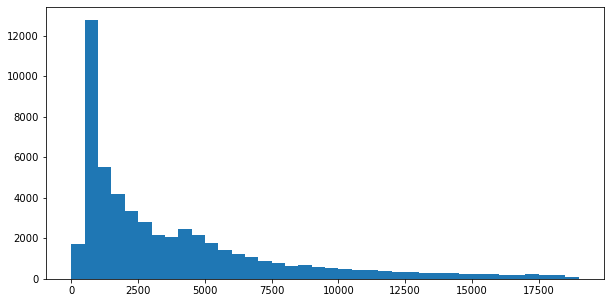

In [5]:
# plotting a histogram since price is a quantitative variable
# specify bins
plt.figure(figsize=[10,5])
bins = np.arange(0, diamonds['price'].max()+500, 500)
plt.hist(data=diamonds, x='price', bins=bins);
# sns.displot(diamonds['price'], bins=bins);

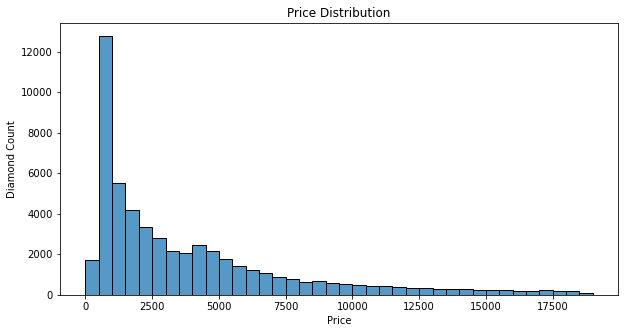

In [6]:
# using seaborn
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.histplot(ax=ax, x=diamonds['price'], bins=bins)
plt.xlabel('Price')
plt.ylabel('Diamond Count')
plt.title('Price Distribution');

Price distribution comments: the distribution is highly skewed to the right, with most diamonds falling between the $500-$1000 range. The pricier they get, the rarer they become. 

In [7]:
# to help figure out the new bins, use describe()
# with np.log10
np.log10(diamonds['price'].describe())

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

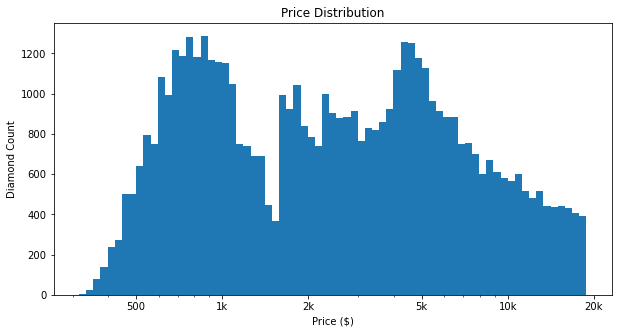

In [8]:
# plotting using log scaling
bins = 10 ** np.arange(2.5, np.log10(diamonds['price'].max())+0.025, 0.025)

plt.figure(figsize=(10,5))
plt.hist(data=diamonds, x='price', bins=bins)
plt.xlabel('Price ($)')
plt.ylabel('Diamond Count')
plt.title('Price Distribution')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k']);

Under a log scale, the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

**Task 2**: Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

In [9]:
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

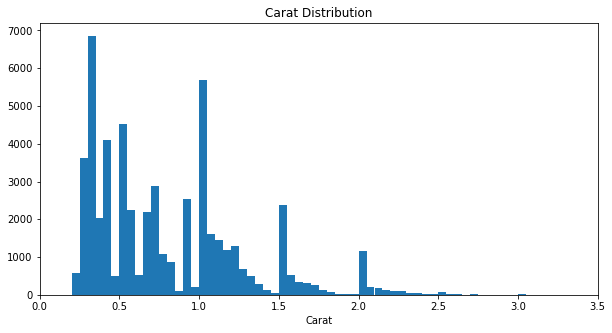

In [10]:
base_color = sns.color_palette()[0]
bins = np.arange(0, diamonds['carat'].max()+0.05,0.05)

plt.figure(figsize=[10,5])
plt.xlim([0, 3.5])
plt.hist(data=diamonds, x='carat', color=base_color, bins=bins)
plt.xlabel('Carat')
plt.title('Carat Distribution');

There is an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?

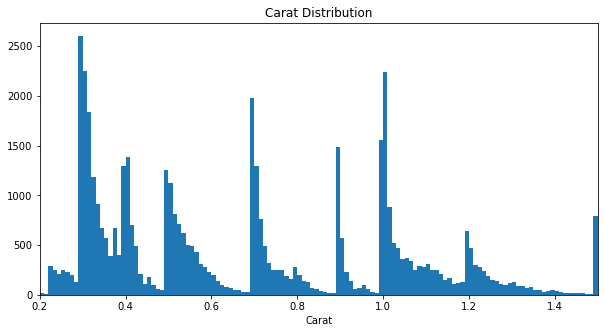

In [11]:
# investigating on an even smaller bin size
bins = np.arange(0.2, 1.51, 0.01)

plt.figure(figsize=[10,5])
plt.hist(data=diamonds, x='carat', color=base_color, bins=bins)
plt.xlim([0.2, 1.5])
plt.xlabel('Carat')
plt.title('Carat Distribution');

In the case of carat, the small bin size proves very illuminating. There are very large spikes in frequency at the bars with one digit of precision (e.g. 0.3, 0.7, 1.0); frequency quickly trails off until the next spike. These probably represent standard diamond sizes for use in jewelry.

**Task 3**: Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

In [12]:
# turning cut, color and clarity into categories
# this will be helpful so that the visualizations
# will be correctly sorted

# create lists with the categories
# increasing cut grades go from low ('Fair') to best ('Ideal')
cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
# increasing color grades go from some color ('J') to colorless ('D')
color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
# increasing clarity grades go from inclusions ('I1') to internally flawless ('IF')
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# now create the categoricaldtype variables
cut_classes = pd.api.types.CategoricalDtype(ordered=True, categories=cut)
color_classes = pd.api.types.CategoricalDtype(ordered=True, categories=color)
clarity_classes = pd.api.types.CategoricalDtype(ordered=True, categories=clarity)

# now use astype() to turn the object columns into category
diamonds['cut'] = diamonds['cut'].astype(cut_classes)
diamonds['color'] = diamonds['color'].astype(color_classes)
diamonds['clarity'] = diamonds['clarity'].astype(clarity_classes)

In [13]:
# if we do it as a dict, the code is cleaner
# convert cut, color, and clarity into ordered categorical types
# ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
#                     'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
#                     'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

# for var in ordinal_var_dict:
#     ordered_var = pd.api.types.CategoricalDtype(ordered = True,
#                                                 categories = ordinal_var_dict[var])
#     diamonds[var] = diamonds[var].astype(ordered_var)

In [14]:
diamonds[['cut', 'color', 'clarity']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cut      53940 non-null  category
 1   color    53940 non-null  category
 2   clarity  53940 non-null  category
dtypes: category(3)
memory usage: 159.1 KB


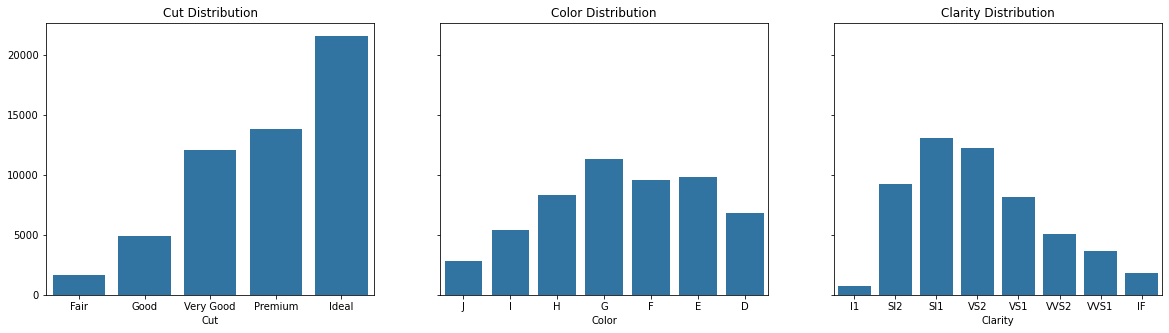

In [15]:
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(1, 3, figsize=[20,5], sharey=True)

# plot 1: cut
sns.countplot(ax=axes[0], data=diamonds, x='cut', color=base_color)
axes[0].set_ylabel('')
axes[0].set_xlabel('Cut')
axes[0].set_title('Cut Distribution')

# plot 2: color
sns.countplot(ax=axes[1], data=diamonds, x='color', color=base_color)
axes[1].set_ylabel('')
axes[1].set_xlabel('Color')
axes[1].set_title('Color Distribution')

# plot 3: clarity
sns.countplot(ax=axes[2], data=diamonds, x='clarity', color=base_color)
axes[2].set_ylabel('')
axes[2].set_xlabel('Clarity')
axes[2].set_title('Clarity Distribution');

Cut distribution comment: the mode cut quality for diamonds is the highest grade, Ideal. Also, there is a consistent decrease in number of diamonds of lower cut grades.

Color distribution comment: color is more evenly distributed, especially from H to E. The distribution is roughly unimodal, with the most common belonging to the central grade, G. 

Clarity distribution comment: there is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).

In [16]:
# CONTINUE IN BIVARIATE EXPLORATION!